In [33]:
import requests
from bs4 import BeautifulSoup
import spacy
nlp = spacy.load("en_core_web_sm")
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

from pattern.en import sentiment
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Gautam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
r = requests.get('https://www.newsy.com/stories/commercial-companies-advance-space-exploration/')

In [8]:
html = r.text

In [9]:
soup = BeautifulSoup(html)

In [10]:
text = soup.get_text()

In [11]:
print(text)

Commercial Companies Advance Space Exploration (VIDEO)




Scripps NewsnewsU.S. NewsWorldLifePoliticsScience/HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us






SpaceHow Commercial Companies Are Advancing Space ExplorationThere's competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAArticle by Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the 'Starship' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musk's mission-to-Mars dreams a reality."He says, 'I want to die on Mars, just not on impact,'" editor for Spaceref.

In [12]:
clear_text = text.replace("/", " ")
clear_text = clear_text.replace("\n", " ")
clear_text = clear_text.replace("\xa0", " ")
clear_text = "".join([c for c in clear_text if c!= "'"])
clear_text

'Commercial Companies Advance Space Exploration (VIDEO)     Scripps NewsnewsU.S. NewsWorldLifePoliticsScience HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us       SpaceHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAArticle by Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musks mission-to-Mars dreams a reality."He says, I want to die on Mars, just not on impact," editor for Spaceref.com K

In [13]:
sentence=[]
tokens = nlp(clear_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence[2]

'How Commercial Companies Are Advancing Space ExplorationNASAArticle by Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.'

In [14]:
text_sentiment = []
for s in sentence:
    t =  TextBlob(s)
    a = t.sentiment.polarity
    b = t.sentiment.subjectivity
    text_sentiment.append([s, a, b])
# print(text_sentiment)

In [15]:
Data = pd.DataFrame(text_sentiment, columns = ["Sentence", "Polarity", "Subjectivity"])

In [16]:
Data.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.000000,0.000000
1,Scripps NewsnewsU.S. NewsWorldLifePoliticsScie...,0.009091,0.307386
2,How Commercial Companies Are Advancing Space E...,0.040000,0.600000
3,Newly released video shows the Starship liftin...,0.136364,0.454545
4,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667


In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      35 non-null     object 
 1   Polarity      35 non-null     float64
 2   Subjectivity  35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes


Text(0.5, 9.444444444444459, 'Sentence Polarity (Textblob)')

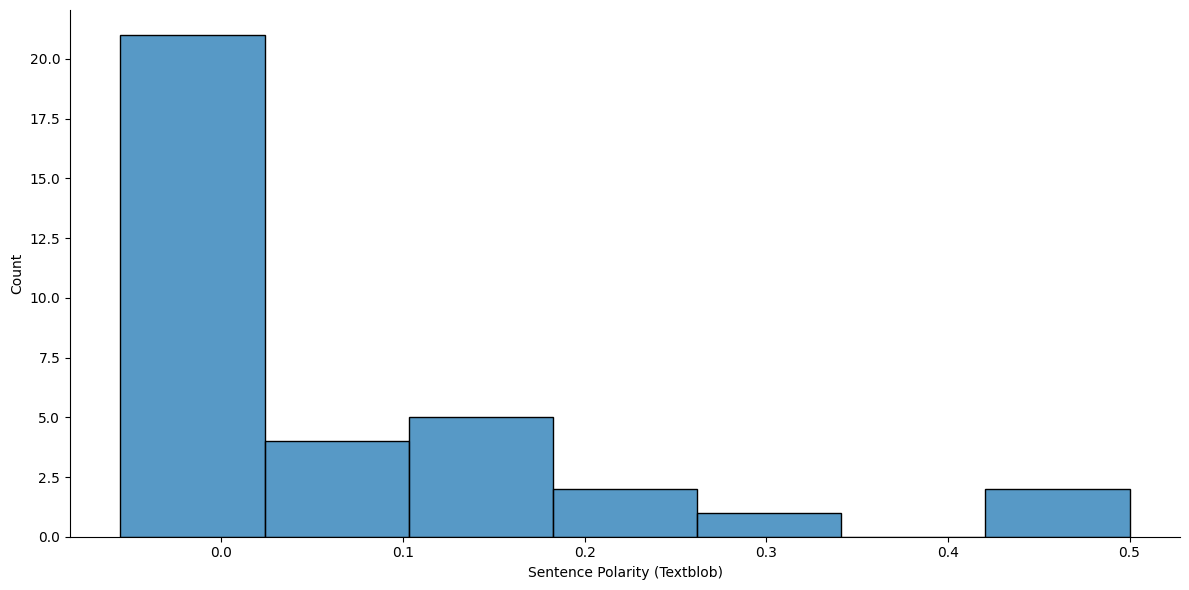

In [18]:
sns.displot(Data["Polarity"], height=6, aspect=2)
plt.xlabel("Sentence Polarity (Textblob)")

In [19]:
pattern_sentiment=[]
for s in sentence:
    txtSent= sentiment(s)
    c= txtSent[0]
    d= txtSent[1]
    pattern_sentiment.append([s,c,d])

In [20]:
pattern_sentiment[1]

['Scripps NewsnewsU.S. NewsWorldLifePoliticsScience HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us       SpaceHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.',
 0.009090909090909087,
 0.3073863636363636]

In [21]:
DataSentiment = pd.DataFrame(pattern_sentiment, columns=["Sentence", "Polarity", "Subjectivity"])

In [22]:
DataSentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      35 non-null     object 
 1   Polarity      35 non-null     float64
 2   Subjectivity  35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes


In [23]:
DataSentiment.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.000000,0.000000
1,Scripps NewsnewsU.S. NewsWorldLifePoliticsScie...,0.009091,0.307386
2,How Commercial Companies Are Advancing Space E...,0.040000,0.600000
3,Newly released video shows the Starship liftin...,0.136364,0.454545
4,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667


Text(0.5, 9.444444444444459, 'Sentence Polarity (Pattern)')

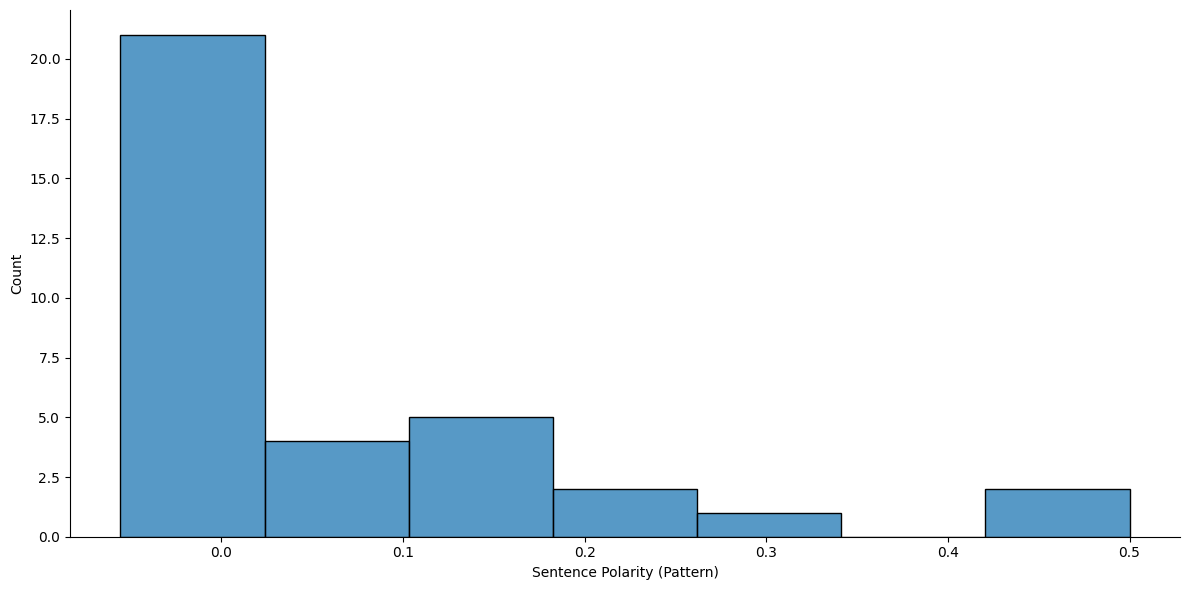

In [24]:
sns.displot(DataSentiment["Polarity"], height= 6, aspect=2)
plt.xlabel("Sentence Polarity (Pattern)")

### 

In [25]:
#Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

In [26]:
tokens = tokenizer.tokenize(clear_text)

In [27]:
len(tokens)

764

In [28]:
print(tokens[0:10])

['Commercial', 'Companies', 'Advance', 'Space', 'Exploration', 'VIDEO', 'Scripps', 'NewsnewsU', 'S', 'NewsWorldLifePoliticsScience']


In [29]:
word_list = []
for word in tokens:
    word_list.append(word.lower())

In [34]:
stop_words = stopwords.words('english')

In [35]:
word_updated = []
for word in word_list:
    if word not in stop_words:
        word_updated.append(word)

In [36]:
len(word_updated)

469

In [37]:
print(word_updated[0:10])

['commercial', 'companies', 'advance', 'space', 'exploration', 'video', 'scripps', 'newsnewsu', 'newsworldlifepoliticsscience', 'healthtechbusinessentertainmentsportsmental']


In [38]:
freq_dist = nltk.FreqDist(word_updated)

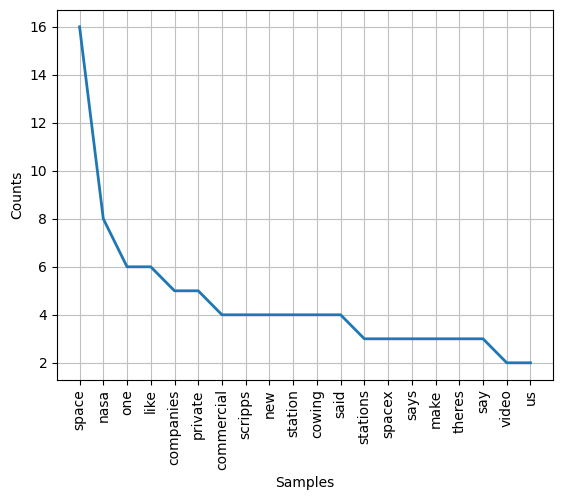

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [39]:
freq_dist.plot(20)

In [40]:
result=' '.join([i for i in word_updated if not i.isdigit()])

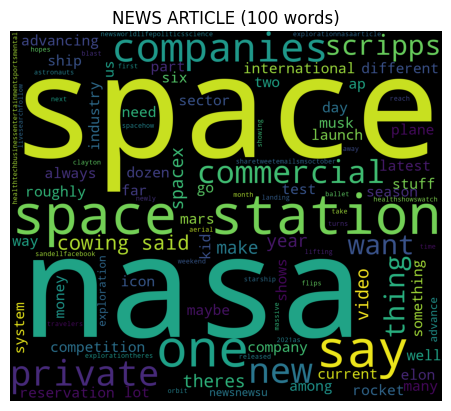

In [41]:
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(result)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()